# **Library and Module Imports for Data Preprocessing and Machine Learning**

In [ ]:
# Using ! to execute a command in the command line or terminal

!pip install tldextract

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.7/97.7 kB 862.9 kB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from imblearn.combine import SMOTEENN
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

import joblib
import pandas as pd
import re
import tldextract
import matplotlib.pyplot as plt
import seaborn as sns

# **Load Data using Pandas**

In [ ]:
# Importing the 'drive' module from the 'google.colab' library to mount Google Drive
from google.colab import drive

# Mounting the Google Drive at the '/content/drive' directory
drive.mount('/content/drive')


# Load your dataset
df = pd.read_csv('/content/drive/MyDrive/data.csv')

# display first 5 rows
df.head(5)

Mounted at /content/drive


,Domain,category
0,grapevineplumbing.com,1
1,willswebsitedemos.com,1
2,wolfriverpress.com,1
3,fashionistatoolkit.com,1
4,407visa.com,1


# **Feature Engineering for Domain Analysis**

In [ ]:
def get_alpha_word(word):
  res = ''
  for i in word:
    if i.isalpha():
      res += i
  return res.upper()

In [ ]:
# Extracting the first part of the domain and converting it to lowercase
df['DName'] = df['Domain'].apply(lambda x: x.split('.')[0].lower())

# Counting the number of dots in the domain
df['DDots'] = df['Domain'].apply(lambda x: x.count('.'))

# Checking if the domain name contains a hyphen
df['DHaveHyphen'] = df['DName'].apply(lambda x: 1 if '-' in x else 0)

# Counting the number of vowels in the domain name
df['DVowelCount'] = df['DName'].apply(lambda x: sum(1 for char in x if char.lower() in 'aeiou'))

# Checking if the domain name contains special characters
df['DHaveSpecialChar'] = df['DName'].apply(lambda x: 1 if not x.isalnum() else 0)

# Creating a binary feature based on whether the domain name is a common word
common_words = set(['example1', 'example2', 'example3', 'domain', 'web', 'tech', 'online', 'blog', 'site'])
df['DIsCommonWord'] = df['DName'].apply(lambda x: 1 if x in common_words else 0)

df['Subdomain'] = df['Domain'].apply(lambda x: tldextract.extract(x).subdomain)

# Calculating the length of the subdomain
df['SubdomainLength'] = df['Subdomain'].apply(lambda x: len(x) if x else 0)

# Calculating the length of the domain name
df['DLength'] = df['DName'].apply(lambda x: len(x))

# Checking if the domain name contains digits
df['DHaveDigits'] = df['DName'].apply(lambda x: 0 if len(re.findall('\d', x)) == 0 else 1)

# Creating a binary feature based on whether all characters in the domain name are digits
df['DAllDigits'] = df.apply(lambda x: 1 if len(re.findall('\d', x['DName'])) == x['DLength'] else 0, axis=1)

df['SpecialCharactersCount'] = df['Domain'].apply(lambda x: sum(1 for char in x.split('.')[0] if not char.isalpha()))

df

,Domain,category,DName,DDots,DHaveHyphen,DVowelCount,DHaveSpecialChar,DIsCommonWord,Subdomain,SubdomainLength,DLength,DHaveDigits,DAllDigits,SpecialCharactersCount
0,grapevineplumbing.com,1,grapevineplumbing,1,0,6,0,0,,0,17,0,0,0
1,willswebsitedemos.com,1,willswebsitedemos,1,0,6,0,0,,0,17,0,0,0
2,wolfriverpress.com,1,wolfriverpress,1,0,4,0,0,,0,14,0,0,0
3,fashionistatoolkit.com,1,fashionistatoolkit,1,0,8,0,0,,0,18,0,0,0
4,407visa.com,1,407visa,1,0,2,0,0,,0,7,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683327,kkk15.com,5,kkk15,1,0,0,0,0,,0,5,1,0,2
683328,cubics.com,5,cubics,1,0,2,0,0,,0,6,0,0,0
683329,nationalpainreport.com,5,nationalpainreport,1,0,8,0,0,,0,18,0,0,0
683330,colormedical.com,5,colormedical,1,0,5,0,0,,0,12,0,0,0


In [ ]:
extension_scores = {'com': 3, 'net': 2, 'org': 1}

df['ExtensionScore'] = df['Domain'].apply(lambda x: extension_scores.get(x.split('.')[-1].lower(), 0))


df

,Domain,category,DName,DDots,DHaveHyphen,DVowelCount,DHaveSpecialChar,DIsCommonWord,Subdomain,SubdomainLength,DLength,DHaveDigits,DAllDigits,SpecialCharactersCount,ExtensionScore
0,grapevineplumbing.com,1,grapevineplumbing,1,0,6,0,0,,0,17,0,0,0,3
1,willswebsitedemos.com,1,willswebsitedemos,1,0,6,0,0,,0,17,0,0,0,3
2,wolfriverpress.com,1,wolfriverpress,1,0,4,0,0,,0,14,0,0,0,3
3,fashionistatoolkit.com,1,fashionistatoolkit,1,0,8,0,0,,0,18,0,0,0,3
4,407visa.com,1,407visa,1,0,2,0,0,,0,7,1,0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683327,kkk15.com,5,kkk15,1,0,0,0,0,,0,5,1,0,2,3
683328,cubics.com,5,cubics,1,0,2,0,0,,0,6,0,0,0,3
683329,nationalpainreport.com,5,nationalpainreport,1,0,8,0,0,,0,18,0,0,0,3
683330,colormedical.com,5,colormedical,1,0,5,0,0,,0,12,0,0,0,3


In [ ]:
# Assuming 'category' is the column to be one-hot encoded
df_encoded = pd.get_dummies(df, columns=['category'])
df.head()

,Domain,category,DName,DDots,DHaveHyphen,DVowelCount,DHaveSpecialChar,DIsCommonWord,Subdomain,SubdomainLength,DLength,DHaveDigits,DAllDigits,SpecialCharactersCount,ExtensionScore
0,grapevineplumbing.com,1,grapevineplumbing,1,0,6,0,0,,0,17,0,0,0,3
1,willswebsitedemos.com,1,willswebsitedemos,1,0,6,0,0,,0,17,0,0,0,3
2,wolfriverpress.com,1,wolfriverpress,1,0,4,0,0,,0,14,0,0,0,3
3,fashionistatoolkit.com,1,fashionistatoolkit,1,0,8,0,0,,0,18,0,0,0,3
4,407visa.com,1,407visa,1,0,2,0,0,,0,7,1,0,3,3


In [ ]:
# Features
col_features = ['DDots', 'DHaveHyphen', 'DVowelCount', 'DHaveSpecialChar', 'DIsCommonWord', 'SubdomainLength', 'DLength', 'DHaveDigits', 'DAllDigits', 'SpecialCharactersCount', 'SpecialCharactersCount', 'ExtensionScore']

In [ ]:
df.isnull().sum()

Domain                    0
category                  0
DName                     0
DDots                     0
DHaveHyphen               0
DVowelCount               0
DHaveSpecialChar          0
DIsCommonWord             0
Subdomain                 0
SubdomainLength           0
DLength                   0
DHaveDigits               0
DAllDigits                0
SpecialCharactersCount    0
ExtensionScore            0
dtype: int64

<Axes: ylabel='category'>

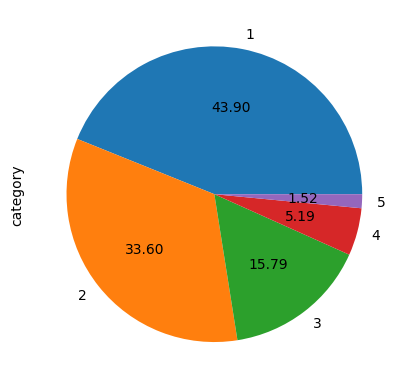

In [ ]:
# Specify the target variable
y = df['category']

# Specify the feature matrix
X = df[col_features]

# target label visualisation
y.value_counts().plot.pie(autopct='%.2f')

# **Splitting the Dataset into Training and Testing Sets**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Class Imbalance Mitigation: SMOTE Oversampling**

Class distribution before oversampling: Counter({1: 300000, 2: 229567, 3: 107932, 4: 35454, 5: 10379})


/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Class distribution after oversampling: Counter({2: 240118, 1: 240118, 3: 240118, 4: 240118, 5: 240118})


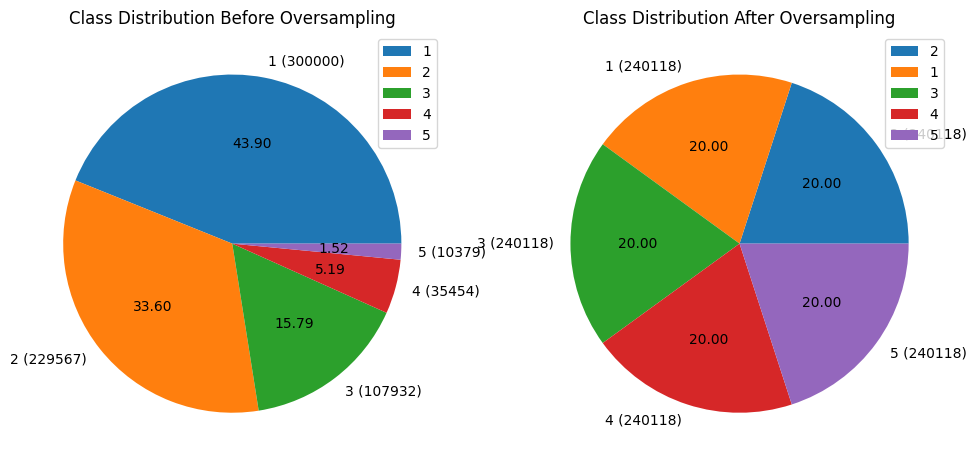

In [ ]:
# Check the class distribution before oversampling
print("Class distribution before oversampling:", Counter(y))

# Combine SMOTE and Edited Nearest Neighbors (SMOTEENN) for both oversampling and undersampling
# smoteenn = SMOTEENN(sampling_strategy='auto', random_state=42, n_jobs=-1)
# X_train_resampled, y_train_resampled = smoteenn.fit_resample(X_train, y_train)

smote = SMOTE(sampling_strategy='auto', random_state=42, n_jobs=-1)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the class distribution after oversampling
print("Class distribution after oversampling:", Counter(y_train_resampled))

# Visualize the class distribution before and after oversampling
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Before oversampling
before_oversample_labels = [f"{key} ({value})" for key, value in Counter(y).items()]
axes[0].pie(Counter(y).values(), labels=before_oversample_labels, autopct="%.2f")
axes[0].set_title("Class Distribution Before Oversampling")
axes[0].legend(Counter(y).keys())

# After oversampling
after_oversample_labels = [f"{key} ({value})" for key, value in Counter(y_train_resampled).items()]
axes[1].pie(Counter(y_train_resampled).values(), labels=after_oversample_labels, autopct="%.2f")
axes[1].set_title("Class Distribution After Oversampling")
axes[1].legend(Counter(y_train_resampled).keys())

plt.show()

# **Building Models with different Algorithms**

Best Parameters: {'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 6, 'n_estimators': 64}


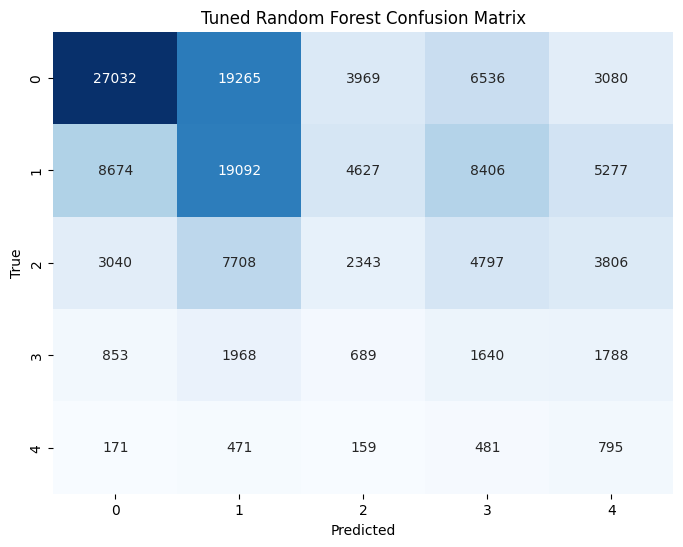

Tuned Random Forest Classification Report:
               precision    recall  f1-score   support

           1       0.68      0.45      0.54     59882
           2       0.39      0.41      0.40     46076
           3       0.20      0.11      0.14     21694
           4       0.08      0.24      0.11      6938
           5       0.05      0.38      0.09      2077

    accuracy                           0.37    136667
   macro avg       0.28      0.32      0.26    136667
weighted avg       0.47      0.37      0.40    136667

Tuned Random Forest Accuracy: 0.37245275011524365


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter distribution for Random Forest
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [None] + list(randint(1, 20).rvs(10)),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5)
}

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Create RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_dist,
                                   n_iter=1, cv=2, scoring='accuracy', n_jobs=-1, random_state=42)

# Fit the model on the resampled training data with randomized search
random_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters
best_params = random_search.best_params_
print("Best Parameters:", best_params)

# Save the best model for future predictions
best_rf_classifier = random_search.best_estimator_
joblib.dump(best_rf_classifier, 'best_rf_classifier_random_search.joblib')

# Make predictions on the test set with the best model
y_pred_rf_tuned = best_rf_classifier.predict(X_test)

# Confusion matrix
cm_rf_tuned = confusion_matrix(y_test, y_pred_rf_tuned)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf_tuned, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Tuned Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Classification Report
print("Tuned Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf_tuned))

# Evaluate the accuracy of the tuned model
accuracy_rf_tuned = accuracy_score(y_test, y_pred_rf_tuned)
print("Tuned Random Forest Accuracy:", accuracy_rf_tuned)


Best Parameters for KNN (Randomized Search): {'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}


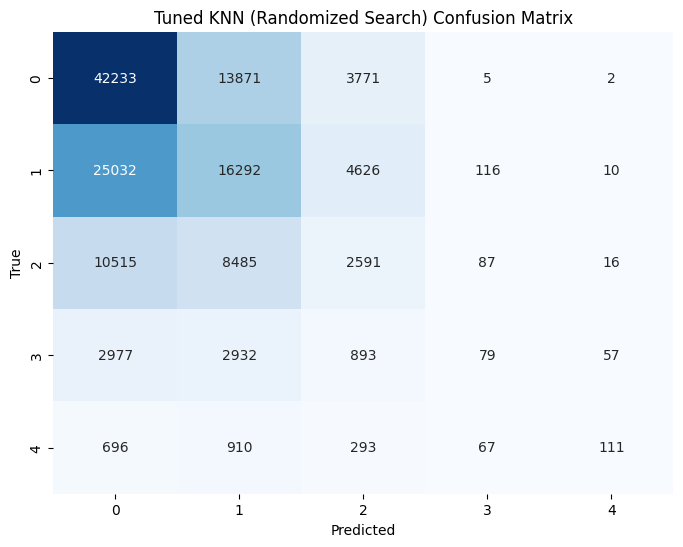

Tuned KNN (Randomized Search) Classification Report:
               precision    recall  f1-score   support

           1       0.52      0.71      0.60     59882
           2       0.38      0.35      0.37     46076
           3       0.21      0.12      0.15     21694
           4       0.22      0.01      0.02      6938
           5       0.57      0.05      0.10      2077

    accuracy                           0.45    136667
   macro avg       0.38      0.25      0.25    136667
weighted avg       0.41      0.45      0.41    136667

Tuned KNN (Randomized Search) Accuracy: 0.44857939370879585


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter distribution for KNN
param_dist_knn = {
    'n_neighbors': randint(3, 20),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Create a KNN Classifier
knn_classifier = KNeighborsClassifier()

# Create RandomizedSearchCV
random_search_knn = RandomizedSearchCV(estimator=knn_classifier, param_distributions=param_dist_knn,
                                        n_iter=1, cv=2, scoring='accuracy', n_jobs=-1, random_state=42)

# Fit the model on the resampled training data with randomized search
random_search_knn.fit(X_train_resampled, y_train_resampled)

# Get the best parameters
best_params_knn_random = random_search_knn.best_params_
print("Best Parameters for KNN (Randomized Search):", best_params_knn_random)

# Save the best model for future predictions
best_knn_classifier_random = random_search_knn.best_estimator_
joblib.dump(best_knn_classifier_random, 'best_knn_classifier_random_search.joblib')

# Make predictions on the test set with the best model
y_pred_knn_tuned_random = best_knn_classifier_random.predict(X_test)

# Confusion matrix
cm_knn_tuned_random = confusion_matrix(y_test, y_pred_knn_tuned_random)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn_tuned_random, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Tuned KNN (Randomized Search) Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Classification Report
print("Tuned KNN (Randomized Search) Classification Report:\n", classification_report(y_test, y_pred_knn_tuned_random))

# Evaluate the accuracy of the tuned model
accuracy_knn_tuned_random = accuracy_score(y_test, y_pred_knn_tuned_random)
print("Tuned KNN (Randomized Search) Accuracy:", accuracy_knn_tuned_random)

Best Parameters for Decision Tree (Randomized Search): {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 8, 'splitter': 'best'}


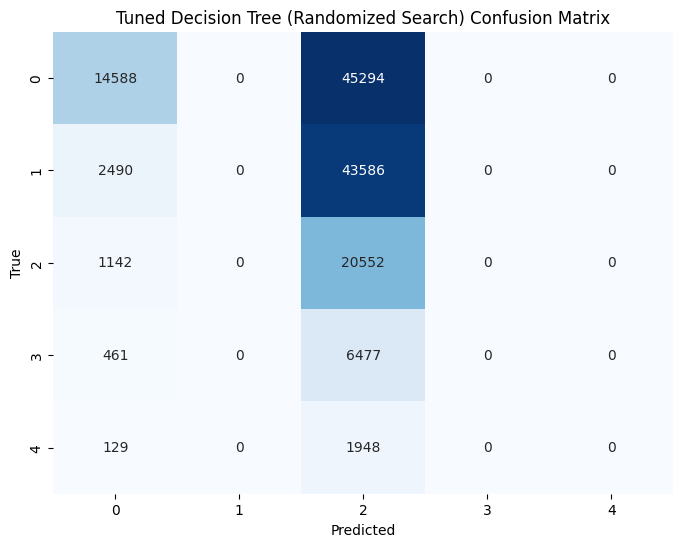

Tuned Decision Tree (Randomized Search) Classification Report:
               precision    recall  f1-score   support

           1       0.78      0.24      0.37     59882
           2       0.00      0.00      0.00     46076
           3       0.17      0.95      0.29     21694
           4       0.00      0.00      0.00      6938
           5       0.00      0.00      0.00      2077

    accuracy                           0.26    136667
   macro avg       0.19      0.24      0.13    136667
weighted avg       0.37      0.26      0.21    136667

Tuned Decision Tree (Randomized Search) Accuracy: 0.25712132409433147


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter distribution for Decision Tree
param_dist_dt = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None] + list(randint(1, 20).rvs(10)),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5)
}

# Create a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Create RandomizedSearchCV
random_search_dt = RandomizedSearchCV(estimator=dt_classifier, param_distributions=param_dist_dt,
                                      n_iter=1, cv=2, scoring='accuracy', n_jobs=-1, random_state=42)

# Fit the model on the resampled training data with randomized search
random_search_dt.fit(X_train_resampled, y_train_resampled)

# Get the best parameters
best_params_dt_random = random_search_dt.best_params_
print("Best Parameters for Decision Tree (Randomized Search):", best_params_dt_random)

# Save the best model for future predictions
best_dt_classifier_random = random_search_dt.best_estimator_
joblib.dump(best_dt_classifier_random, 'best_dt_classifier_random_search.joblib')

# Make predictions on the test set with the best model
y_pred_dt_tuned_random = best_dt_classifier_random.predict(X_test)

# Confusion matrix
cm_dt_tuned_random = confusion_matrix(y_test, y_pred_dt_tuned_random)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt_tuned_random, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Tuned Decision Tree (Randomized Search) Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Classification Report
print("Tuned Decision Tree (Randomized Search) Classification Report:\n", classification_report(y_test, y_pred_dt_tuned_random))

# Evaluate the accuracy of the tuned model
accuracy_dt_tuned_random = accuracy_score(y_test, y_pred_dt_tuned_random)
print("Tuned Decision Tree (Randomized Search) Accuracy:", accuracy_dt_tuned_random)

# **Predicting for a Specific Domain**

In [ ]:
# Section: Predicting for a Specific Domain

# Assume I want to predict a Specific Domain
specific_domain = 'your_specific_domain.com'

# Create a DataFrame for the specific domain
specific_domain_df = pd.DataFrame({
    'DDots': [specific_domain.count('.')],
    'DHaveHyphen': [1 if '-' in specific_domain.split('.')[0] else 0],
    'DVowelCount': [sum(1 for char in specific_domain.split('.')[0] if char.lower() in 'aeiou')],
    'DHaveSpecialChar': [1 if not specific_domain.split('.')[0].isalnum() else 0],
    'DIsCommonWord': [1 if specific_domain.split('.')[0] in common_words else 0],
    'SubdomainLength': [len(tldextract.extract(specific_domain).subdomain)],
    'DLength': [len(specific_domain.split('.')[0])],
    'DHaveDigits': [0 if len(re.findall('\d', specific_domain.split('.')[0])) == 0 else 1],
    'DAllDigits': [1 if len(re.findall('\d', specific_domain.split('.')[0])) == len(specific_domain.split('.')[0]) else 0],
    'SpecialCharactersCount': [sum(1 for char in specific_domain.split('.')[0] if not char.isalnum())],
    'ExtensionScore': [extension_scores.get(specific_domain.split('.')[-1].lower(), 0)]
})

# Extract features for prediction
specific_domain_features = specific_domain_df[col_features]

# Make predictions using the trained model
prediction = best_knn_classifier_random.predict(specific_domain_features)

# Print the prediction
print("Prediction for", specific_domain, ":", prediction[0])

Prediction for your_specific_domain.com : 1


In [ ]:
from nbconvert import HTMLExporter
import nbformat


notebook_filename = '/content/drive/MyDrive/domain_prediction.ipynb'

# Read the notebook
with open(notebook_filename, 'r', encoding='utf-8') as notebook_file:
    notebook_content = notebook_file.read()

# Convert notebook to HTML
notebook = nbformat.reads(notebook_content, as_version=4)
html_exporter = HTMLExporter()
(body, resources) = html_exporter.from_notebook_node(notebook)

# Save the HTML content to a file
html_filename = notebook_filename.replace('.ipynb', '.html')
with open(html_filename, 'w', encoding='utf-8') as html_file:
    html_file.write(body)